# แบบทดสอบชุดนี้ทดสอบทักษะการเขียนโปรแกรมสำหรับสำรวจข้อมูลเบื้องต้น โดยใช้ข้อมูล Magnetic Resonance Imaging (MRI) ซึ่งเป็นภาพถ่ายทางการแพทย์

ข้อกำหนดเบื้องต้น
1.  ผู้เข้าทดสอบสามารถแก้ข้อมูลใน cell ที่มี comments เขียนไว้ว่า **"ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้"** เท่านั้น
2.  ผู้เข้าทดสอบควรเขียน comments กำกับไว้ เพื่อให้อ่านสามารถเข้าใจโค้ดที่เขียนมาได้ โดยเขียนเป็นภาษาไทยหรือภาษาอังกฤษก็ได้
3.  อาจมีหลายวิธีที่สามารถใช้แก้ปัญหาแบบทดสอบได้ ผู้เข้าทดสอบสามารถเลือกใช้วิธีใดก็ได้


ในการตรวจให้คะแนน มีรายละเอียดเบื้องต้นดังนี้

1.  ให้คะแนนตามความถูกต้องของคำตอบ
2.  ถ้าหากโค้ดในส่วนใดรันไม่ได้ หรือมี error จะได้คะแนนในส่วนนั้นเป็น 0 ทันที
3.  ผู้ตรวจข้อสอบอาจให้คะแนนเพิ่ม (extra credits) เล็กน้อย ในกรณีที่คำตอบของผู้เข้าทดสอบเป็นการเขียนโปรแกรมอย่างสร้างสรรค์และมีประสิทธิภาพเป็นพิเศษ
4.  การเขียนโค้ดที่เข้าใจง่าย เช่น มีการเขียน comments, มีการใช้ชื่อ variable ที่เข้าใจง่าย ก็เป็นทักษะที่สำคัญ ซึ่งจะถูกนำมาพิจารณาเวลาตรวจให้คะแนน

**หมายเหตุ** ผู้เข้าทดสอบควรผ่านการเรียนรู้ [เนื้อหาใน Brain Building Blocks](https://braincode101.github.io/vdo.html) มาแล้ว โดยเฉพาะ Session ที่ 6 และ 7



Part 1: Data Exploration
---

Import modules ที่สำคัญเบื้องต้น

In [74]:
import numpy as np
import matplotlib.pyplot as plt

ทำการ download ข้อมูล MRI ซึ่งจะเป็นไฟล์ `images.npy` กับ `sensor_sens.npy`

ข้อมูลนี้เป็นข้อมูลภาพสมองที่เก็บมาจากเครื่อง MRI โดยเครื่องจะทำการเก็บข้อมูลภาพสมองโดยใช้ sensors ทั้งหมด 32 ตัว

In [75]:
!wget -O images.npy https://github.com/ichatnun/BCC_data_exam2023/raw/main/image.npy
!wget -O sensor_sens.npy https://github.com/ichatnun/BCC_data_exam2023/raw/main/sensor_sens.npy

--2023-07-05 15:46:44--  https://github.com/ichatnun/BCC_data_exam2023/raw/main/image.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/ichatnun/BCC_data_exam2023/main/image.npy [following]
--2023-07-05 15:46:44--  https://media.githubusercontent.com/media/ichatnun/BCC_data_exam2023/main/image.npy
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13895808 (13M) [application/octet-stream]
Saving to: ‘images.npy’

images.npy          100%[===================>]  13.25M  --.-KB/s    in 0.1s    

2023-07-05 15:46:45 (119 MB/s) - ‘images.npy’ saved [13895808/13895808]

--2023-07-05 15:

**คำสั่ง**
จง load ข้อมูลจาก `images.npy` มาเก็บไว้ใน variable ชื่อ `image_multi_sens` และ `sensor_sens.npy` มาเก็บไว้ใน variable ชื่อ `sensor_sens`

หากเขียนโค้ดได้ถูกต้อง เราจะมี variables 2 ตัว ดังนี้


*   `image_multi_sens`: ข้อมูลรูปภาพที่เก็บมาจากเครื่อง MRI ที่เป็นภาพสมอง โดยจะมีทั้งหมด 32 ภาพ โดยแต่ละภาพคือข้อมูลที่เก็บมาจาก sensor แต่ละตัว


*   `sensor_sens`: ข้อมูล sensor sensitivity ที่บ่งบอกว่า sensor ตัวไหนมีความ sensitive กับบริเวณไหนในภาพมากหรือน้อยแค่ไหน





In [76]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
# load data
image_multi_sens = np.load('images.npy')
sensor_sens = np.load('sensor_sens.npy')

ทางเจ้าหน้าที่ที่เก็บข้อมูล MRI มาให้เราแจ้งมาว่าทุก element ในข้อมูล `image_multi_sens` และข้อมูล `sensor_sens` ต้องเป็นข้อมูลเชิงซ้อนประเภท complex64

**คำสั่ง** เขียนโค้ดที่ print ออกมาดูว่าข้อมูลของเราเป็น complex64 จริง

In [77]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
print('Datatype image_multi_sens:', image_multi_sens.dtype)
print('Datatype sensor_sens:', sensor_sens.dtype)


Datatype image_multi_sens: complex64
Datatype sensor_sens: complex64


นอกจากนี้ เจ้าหน้าที่ได้แจ้งมาว่าทุก element ในข้อมูล `image_multi_sens` และ ข้อมูล `sensor_sens` จะมีค่า magnitude ไม่น้อยกว่า 0 และไม่มากกว่า 1

**คำสั่ง** เขียนโค้ดเพื่อตรวจสอบว่าข้อมูลของเราทั้งสองข้อมูลมีค่า magnitude ไม่น้อยกว่า 0 และไม่มากกว่า 1

**คำแนะนำ** เราสามารถใช้ `numpy.abs` ในการคำนวณค่า magnitude ได้

In [78]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
'''
  ถ้า abs(magnitude) ไม่อยู่ระหว่าง 0-1 ผลลัพธ์จะเป็น False
  แต่ถ้า abs(magnitude) อยู่ระหว่าง 0-1 ผลลัพธ์จะเป็น True
'''
magnitude_image_multi_sens = np.abs(image_multi_sens)
magnitude_sensor_sens = np.abs(sensor_sens)
print(f'image_multi_sens: {np.all(np.logical_and(np.abs(magnitude_image_multi_sens) >= 0, np.abs(magnitude_image_multi_sens) <= 1))}\nsensor_sens: {np.all(np.logical_and(np.abs(magnitude_sensor_sens) >= 0, np.abs(magnitude_sensor_sens) <= 1))}')

image_multi_sens: True
sensor_sens: True


**คำสั่ง** จงตรวจสอบ shape ของข้อมูล `image_multi_sens` และ ข้อมูล `sensor_sens`

In [79]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
print(f'shape of image_multi_sens: {image_multi_sens.shape}\nsensor_sens: {sensor_sens.shape}')

shape of image_multi_sens: (230, 32, 236)
sensor_sens: (236, 230, 32)


ข้อมูล `image_multi_sens` กับ `sensor_sens` ควรจะมี shape เหมือนกัน

**คำสั่ง** จงเขียนโค้ดที่ปรับแก้การจัดเรียงมิติของข้อมูล `image_multi_sens` ให้มี shape เหมือน `sensor_sens` และเขียนโค้ดสำหรับ confirm ว่าได้ทำการปรับแก้อย่างถูกต้องแล้ว

In [80]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
image_multi_sens = np.transpose(image_multi_sens, (2,0,1))
if(image_multi_sens.shape == sensor_sens.shape):
  print('Same shape = True')
  print(image_multi_sens.shape)
else:
  print(f'Same shape = False\nnow image_multi_sens shape is {image_multi_sens.shape}')

Same shape = True
(236, 230, 32)


cell ถัดไปเป็นหนึ่งในวิธีสำหรับ visualize ข้อมูล image จาก sensor ตัวแรก ตัวที่ 10 ตัวที่ 20 แล้วตัวที่ 30 คู่กับตัว sensitivity ของ sensor



*   หากรันโค้ดแล้วจะเห็นว่าเมื่อ sensor sensitivity มีค่าสูง (สีสว่าง) ตรงไหน ภาพสมองที่ได้รับ ก็จะมีความสว่างในบริเวณเดียวกัน ซึ่งอันนี้ก็เป็นอีกหนึ่งวิธีในการตรวจสอบข้อมูลของเราว่าเป็นไปตามที่เราคาดไว้หรือไม่
*   ในกรณีทั่วไป หากเราต้องการ visualize ข้อมูล MRI ซึ่งมักจะเป็นจำนวนเชิงซ้อน เรามันจะนำเอา magnitude มา visualize แทน



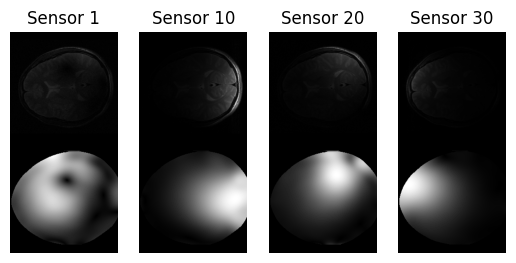

In [81]:
num_sensors = sensor_sens.shape[-1]
target_sens = [0,9,19,29]

fig, ax = plt.subplots(1,4)

for count, idx_sensor in enumerate(target_sens):

    # นำเอาภาพสมองมาประกบคู่กับภาพ sensor sensitivity
    concat_img = np.concatenate((image_multi_sens[:,:,idx_sensor], sensor_sens[:,:,idx_sensor]), axis=0)

    # Plot magnitude ของภาพแต่ละภาพ
    ax[count].imshow(np.abs(concat_img), cmap="gray")
    ax[count].set_axis_off()
    ax[count].set_title(f"Sensor {idx_sensor+1}")

plt.show()

Part 2: Reconstruction
---

ในการใช้ MRI สำหรับทำการวินิจฉัยทางการแพทย์ เราจะต้องทำการรวบรวมข้อมูลจาก sensor ทั้งหมดมารวมกันเป็นภาพเดียวก่อน

ในโค้ด cell ถัดไป มีนักวิจัยสองท่านได้เขียนฟังก์ชันสำหรับการรวมภาพจาก sensor ทั้งหมด มารวมกัน

In [82]:
# image_multi_sensors ต้องมี shape จัดเรียงเป็น (จำนวน rows, จำนวน columns, จำนวน sensors) เท่านั้น
def combined_data_from_sensors1(image_multi_sensors):
    image_combined = np.sum(np.abs(image_multi_sensors)**2, axis=-1)
    image_combined /= np.max(np.abs(image_combined))
    return image_combined

# image_multi_sensors และ sensor_sensitivities ต้องมี shape จัดเรียงเป็น (จำนวน rows, จำนวน columns, จำนวน sensors) เท่านั้น
def combined_data_from_sensors2(image_multi_sensors, sensor_sensitivities):
    image_combined = np.sum(np.conjugate(sensor_sensitivities) * image_multi_sensors, axis=-1)
    image_combined /= np.max(np.abs(image_combined))
    return image_combined


**คำสั่ง** จงเรียกใช้ฟังก์ชัน `combined_data_from_sensors1` จากนักวิจัยท่านแรก มารวมภาพจากหลาย sensor เข้าด้วยกัน โดยเก็บข้อมูลไว้ใน variable ที่มีชื่อว่า `image_combined1` และเขียนโค้ด print ดูว่าข้อมูลที่ได้มี shape เหมาะสม

In [83]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
image_combined1 = combined_data_from_sensors1(image_multi_sens)
print(f'shpae is {image_combined1.shape} with data type {image_combined1.dtype}')

shpae is (236, 230) with data type float32


**คำสั่ง** จงนำเอาภาพที่ได้รับจากการรวมข้อมูลด้วยเทคนิคจากนักวิจัยท่านแรกมา visualize ในรูปแบบที่เหมาะสมต่อการส่งไปให้รังสีแพทย์นำไปอ่านผลได้ โดยไม่ต้องปรับแก้อะไรในรูป (เช่น ความสว่าง) เพิ่มเติม เพื่อให้ประหยัดเวลาการทำงานของแพทย์มากที่สุด

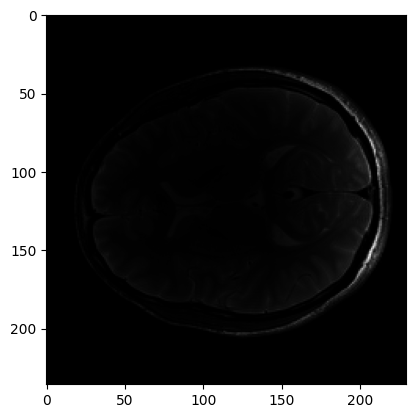

In [84]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
plt.imshow(image_combined1, cmap='gray')
plt.show()

**คำสั่ง** จงเรียกใช้ฟังก์ชัน `combined_data_from_sensors2` จากนักวิจัยท่านที่ 2 มารวมภาพจากหลาย sensor เข้าด้วยกัน โดยเก็บข้อมูลไว้ใน variable ที่มีชื่อว่า `image_combined2` และเขียนโค้ด print ดูว่าข้อมูลที่ได้มี shape เหมาะสม

In [85]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
image_combined2 = combined_data_from_sensors2(image_multi_sens,sensor_sens)
print(f'shpae is {image_combined2.shape} with data type {image_combined2.dtype}')

shpae is (236, 230) with data type complex64


**คำสั่ง** จงนำเอาภาพที่ได้รับจากการรวมข้อมูลด้วยเทคนิคจากนักวิจัยท่านที่ 2 มา visualize ในรูปแบบที่เหมาะสมต่อการส่งไปให้รังสีแพทย์นำไปอ่านผลได้ โดยไม่ต้องปรับแก้อะไรในรูป (เช่น ความสว่าง) เพิ่มเติม เพื่อให้ประหยัดเวลาการทำงานของแพทย์มากที่สุด

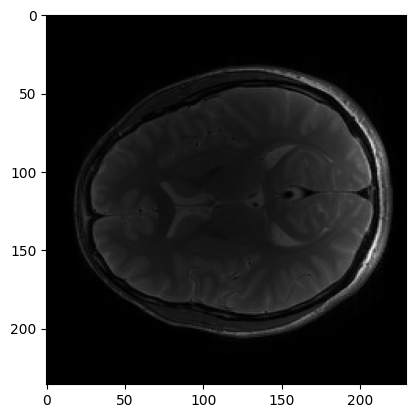

In [86]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
'''
  เนื่องจาก data type ของ image_combined2 เป็น complex64 จึงได้หา abs เพื่อ visualize ข้อมูล
'''
plt.imshow(np.abs(image_combined2), cmap='gray')
plt.show()

Part 3: Evaluation
---

นักวิจัยท่านที่ 3 ได้ทำการนำเอาข้อมูลจากหลาย sensors มารวมกันโดยใช้เทคนิคอะไรบางอย่าง และได้เก็บผลไว้ในไฟล์ที่อยู่ใน https://github.com/ichatnun/BCC_data_exam2023/raw/main/x_recon_mystery.npy

**คำสั่ง** จงเขียนโค้ดสำหรับ download ไฟล์มา และทำการ load เข้ามาเก็บไว้ใน variable ที่ชื่อว่า `image_combined3`

In [87]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
!wget -O images3.npy https://github.com/ichatnun/BCC_data_exam2023/raw/main/x_recon_mystery.npy
image_combined3 = np.load('images3.npy')
print(image_combined3.dtype)
print(image_combined3.shape)

--2023-07-05 15:46:50--  https://github.com/ichatnun/BCC_data_exam2023/raw/main/x_recon_mystery.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/ichatnun/BCC_data_exam2023/main/x_recon_mystery.npy [following]
--2023-07-05 15:46:50--  https://media.githubusercontent.com/media/ichatnun/BCC_data_exam2023/main/x_recon_mystery.npy
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 434368 (424K) [application/octet-stream]
Saving to: ‘images3.npy’

images3.npy         100%[===================>] 424.19K  --.-KB/s    in 0.04s   

2023-07-05 15:46:50 (11.2 MB/s) - ‘images3.npy’ saved [4343

นักวิจัยท่านที่ 3 บอกว่าเค้าใช้เทคนิคในการรวมข้อมูลภาพจากหลาย sensors เข้าด้วยกันเป็นภาพเดียว ในลักษณะเดียวกันกับที่นักวิจัยท่านที่ 2 ทำไว้เลย

**คำสั่ง** จงเขียนโค้ดสำหรับตรวจสอบดูว่าข้อมูลภาพที่นักวิจัยท่านที่ 3 ให้มา (`image_combined3`) เหมือนกับข้อมูลภาพที่เราได้จากการเรียกใช้ `combined_data_from_sensors2` ของนักวิจัยท่านที่ 2 หรือไม่ โดยนำเสนอมาอย่างน้อย 2 วิธี พร้อมทั้งบอกว่าทำไมถึงเลือกวิธีเหล่านั้น

**หมายเหตุ**


*   ถ้าหากเราเลือกใช้วิธีที่จะคำนวณออกมาเป็นตัวเลข จงเขียนโค้ดที่ print ตัวเลขเหล่านั้นออกมาด้วย
*   ถ้าหากเราเลือกวิธีที่ใช้การ plot อะไรบางอย่าง จงเขียนโค้ดที่จะโชว์สิ่งที่เรา plot เหล่านั้นมาด้วย
*   เราสามารถตีความวลีที่ว่า **ข้อมูลภาพเหมือนกัน** ได้หลายแบบ โดยทางผู้จัดงานต้องการให้ลองตีความวลีนี้ โดยการคำนึงถึงรูปแบบการใช้งานจริงในหลาย ๆ กรณี เช่น

  *   กรณีที่ 1 ข้อมูลภาพนี้จะถูกนำไปใช้ต่อโดยแพทย์ ซึ่งแพทย์จะใช้ตาเปล่าดูเป็นหลัก

  *   กรณีที่ 2 แพทย์จะนำเอาข้อมูลนี้ไปให้วิศวกรคอมพิวเตอร์ไปคำนวณข้อมูลทางสถิติของภาพนั้นต่อ เพื่อให้สรุปได้เป็นได้ตัวเลขออกมา แล้วจะนำเอาตัวเลขที่สรุปออกมาได้ไปใช้วินิจฉัยร่วมกับภาพที่ได้จากกรณีที่ 1












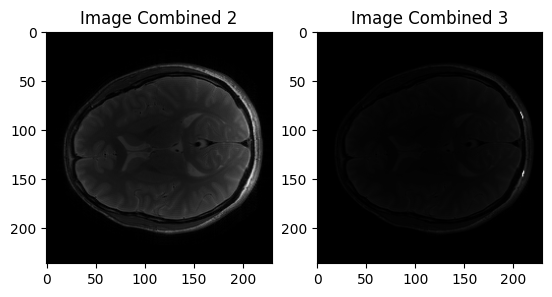


Mean Squared Error (MSE): 0.004456717520952225
structural_similarity (SSIM): 0.997091211065916


In [94]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
'''
  ใช้ squeeze สำหรับ reshape ข้อมูล โดยเอา dimension (230, 1, 236) จึงเอาที่เป็น 1 ออก
  จากนั้นเปลี่ยนแนวภาพ จากแนวตั้งเป็นแนวนอนด้วยคำสั่ง transpose
  และสุดท้ายเปลี่ยนภาพ ซ้าย-ขวา ด้วยคำสั่ง fliplr
'''
if(image_combined3.shape != image_combined2.shape):
  image_combined3 = np.squeeze(image_combined3)
  image_combined3 = np.transpose(image_combined3, (1,0))
  image_combined3 = np.fliplr(image_combined3)
## วิธีที่ 1
'''
  วิธีที่ 1 ใช้ human ground ในการตัดสิน โดยทำการ visualize รูปออกมาเปรียบเทียบ ระหว่าง image_combined2 และ image_combined3
'''
plt.subplot(1, 2, 1)
plt.imshow(np.abs(image_combined2), cmap='gray')
plt.title('Image Combined 2')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(image_combined3), cmap='gray')
plt.title('Image Combined 3')

plt.show()

## วิธีที่ 2
'''
  การใช้ mean squared error เป็นวิธีทั่วไปที่ใช้กันหลากหลาย และง่ายในการเปรียบเทียบความแตกต่างของ pixel รูปภาพสองรูป
  แต่ในการใช้ MSE มีจุดอ่อน เช่น วิธีการนี้ไม่สามารถแยกความแตกต่างทางโครงสร้างของทั้งสองรูปได้
'''
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(np.abs(image_combined2), np.abs(image_combined3))
print(f"\nMean Squared Error (MSE): {mse}")
## วิธีอื่น ๆ (ถ้ามี)
'''
  การใช้ Structural Similarity Index (SSIM) คำนวนความคล้ายของภาพสองภาพ จากความสว่าง contrast และโครงสร้าง ซึ่งเป็นวิธีหนึ่งที่มีประสิทธิภาพเนื่องจากคล้ายการรับรู้ของมนุษย์
'''
from skimage.metrics import structural_similarity
ssim_score = structural_similarity(np.abs(image_combined2), np.abs(image_combined3), data_range=np.abs(image_combined2).max() - np.abs(image_combined2).min())
print(f"structural_similarity (SSIM): {ssim_score}")